In [ ]:
from mwasis import *  # noqa: F403

##  Typowa analiza danych

\begin{tikzpicture}
\draw  (-3,3) ellipse (1.5 and 1);
\node at (-3,3) {Dane};

\uncover<2->{
  \draw [->] (-1.5,3) -- (-0.5,3);
  \draw  (1,3) ellipse (1.5 and 1);
  \node at (1,3) {Magia};
}

\uncover<3->{
  \draw [->] (2.5,3) -- (3.5,3);
  \draw  (5,3) ellipse (1.5 and 1);
  \node at (5,3) {Wnioski};
}
\end{tikzpicture}



## Rozkłady

### Zasada

Wszystko, co jest nieznane opisujemy zmiennymi losowymi.
Szukamy parametrów ich rozkładów.

## Bayes idea

Ale nie znamy parametrów rozkładów

\alert{więc parametry tez stają się zmiennymi losowymi}.


##  Kim jest Piotr?

Piotr jest bardzo nieśmiały i wycofany, niezmiennie pomocny, ale bardzo
mało interesuje się ludźmi czy światem rzeczywistości. Potulny i
schludny, potrzebuje porządku i struktury oraz zamiłowania do szczegółów
”.

---

KRUS - około 1.4 miliona “rolników”

Pracownicy bibliotek - 35 312

Czyli Piotr będzie raczej bibliotekarzem tylko jeżeli:

$$\frac{P(\text{opisane cechy|rolnik})}{P(\text{opisane cechy|bibliotekarz})} < 0.025$$

Dla przykładu, jeżeli każdy bibliotekarz posiada takie cechy jak Piotr
to mniej niż 2.5% rolników musi je mieć, aby szansa, że Piotr jest
bibliotekarzem była większa.

---



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(12, 9))

# --- Rolnicy (Farmers) ---
# Duża grupa ludzi, dlatego reprezentowana przez większy okrąg.
farmers_radius_val = 3.5
farmers_center_x, farmers_center_y = -farmers_radius_val * 0.2, 0 # Nieco przesunięty w lewo
farmers_circle = patches.Circle((farmers_center_x, farmers_center_y), farmers_radius_val,
                                 edgecolor='blue', facecolor='lightblue', alpha=0.4, linewidth=2)
ax.add_patch(farmers_circle)
ax.text(farmers_center_x, farmers_center_y + farmers_radius_val + 0.4, 'Rolnicy (ok. 1.4 miliona osób)',
        ha='center', va='bottom', color='blue', fontsize=14, fontweight='bold')
ax.text(farmers_center_x, farmers_center_y - farmers_radius_val - 0.4,
        'Znacznie większa populacja', ha='center', va='top', color='darkblue', fontsize=10)


# --- Bibliotekarze (Librarians) ---
# Znacznie mniejsza grupa, dlatego reprezentowana przez mniejszy okrąg.
librarians_radius_val = 0.4
librarians_center_x, librarians_center_y = farmers_radius_val * 0.9, -1 # Znacząco przesunięty w prawo
librarians_circle = patches.Circle((librarians_center_x, librarians_center_y), librarians_radius_val,
                                   edgecolor='green', facecolor='lightgreen', alpha=0.4, linewidth=2)
ax.add_patch(librarians_circle)
ax.text(librarians_center_x, librarians_center_y + librarians_radius_val + 0.4, 'Bibliotekarze (35 312 osób)',
        ha='center', va='bottom', color='green', fontsize=14, fontweight='bold')
ax.text(librarians_center_x, librarians_center_y - librarians_radius_val - 0.4,
        'Znacznie mniejsza populacja', ha='center', va='top', color='darkgreen', fontsize=10)

# --- Cechy Piotra (Piotr's Traits) - "Cisi" ---
# Ten okrąg reprezentuje osoby posiadające cechy Piotra (nieśmiałość, zamiłowanie do porządku, mało zainteresowane światem).
# Jego położenie i wielkość ilustrują, jak cechy te rozkładają się w obu populacjach.
trait_radius = 1.7 # Konceptualny rozmiar dla strefy cech
trait_center_x = (farmers_center_x + 2*librarians_center_x) / 2 # Pośrodku między grupami
trait_center_y = 0.5 # Lekko w górę dla lepszej widoczności
trait_circle = patches.Circle((trait_center_x, trait_center_y), trait_radius,
                              edgecolor='red', facecolor='red', alpha=0.15, linestyle='--', linewidth=2)
ax.add_patch(trait_circle)
ax.text(trait_center_x, trait_center_y + trait_radius + 0.4,
        'Osoby z cechami Piotra ("Cisi")', ha='center', va='bottom', color='red', fontsize=14, fontweight='bold')


# Dodanie adnotacji wyjaśniających proporcje
# Adnotacja dla Bibliotekarzy: wysokie prawdopodobieństwo posiadania cech Piotra
ax.annotate('Większość Bibliotekarzy posiada cechy Piotra\n'
            '($P(\\text{cechy|bibliotekarz})$ jest wysokie)',
            xy=(librarians_center_x, librarians_center_y),
            xytext=(librarians_center_x + 1.8, librarians_center_y + 1.8),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
            horizontalalignment='left', verticalalignment='center',
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="red", alpha=0.8),
            fontsize=10, color='darkred')

# Adnotacja dla Rolników: niskie prawdopodobieństwo posiadania cech Piotra
ax.annotate('Bardzo mały odsetek Rolników\nposiada cechy Piotra\n'
            '($P(\\text{cechy|rolnik})$ jest niskie,\nnp. < 2.5%)',
            xy=(farmers_center_x, farmers_center_y),
            xytext=(farmers_center_x - 2.5, farmers_center_y - 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
            horizontalalignment='right', verticalalignment='center',
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="blue", alpha=0.8),
            fontsize=10, color='darkblue')

# Dodanie głównego warunku prawdopodobieństwa
ax.text(0, -4.0,
        r'Piotr będzie raczej bibliotekarzem tylko jeżeli: $\frac{P(\text{opisane cechy|rolnik})}{P(\text{opisane cechy|bibliotekarz})} < 0.025$',
        ha='center', va='top', fontsize=12, color='black', bbox=dict(boxstyle="round,pad=0.5", fc="lightgrey", ec="none", alpha=0.7))


ax.set_title('Wizualizacja szansy Piotra na bycie Bibliotekarzem vs. Rolnikiem', fontsize=18, pad=20)
ax.set_xlim(-6, 6)
ax.set_ylim(-5, 5)
ax.set_aspect('equal', adjustable='box')
ax.axis('off') # Ukrycie osi dla czystszego diagramu

plt.tight_layout()
plt.show()


##  Sherlock Holmes

<!-- ![holmes.png](attachment:b3aac5f0-3989-4126-8832-4b8646381124.png) -->
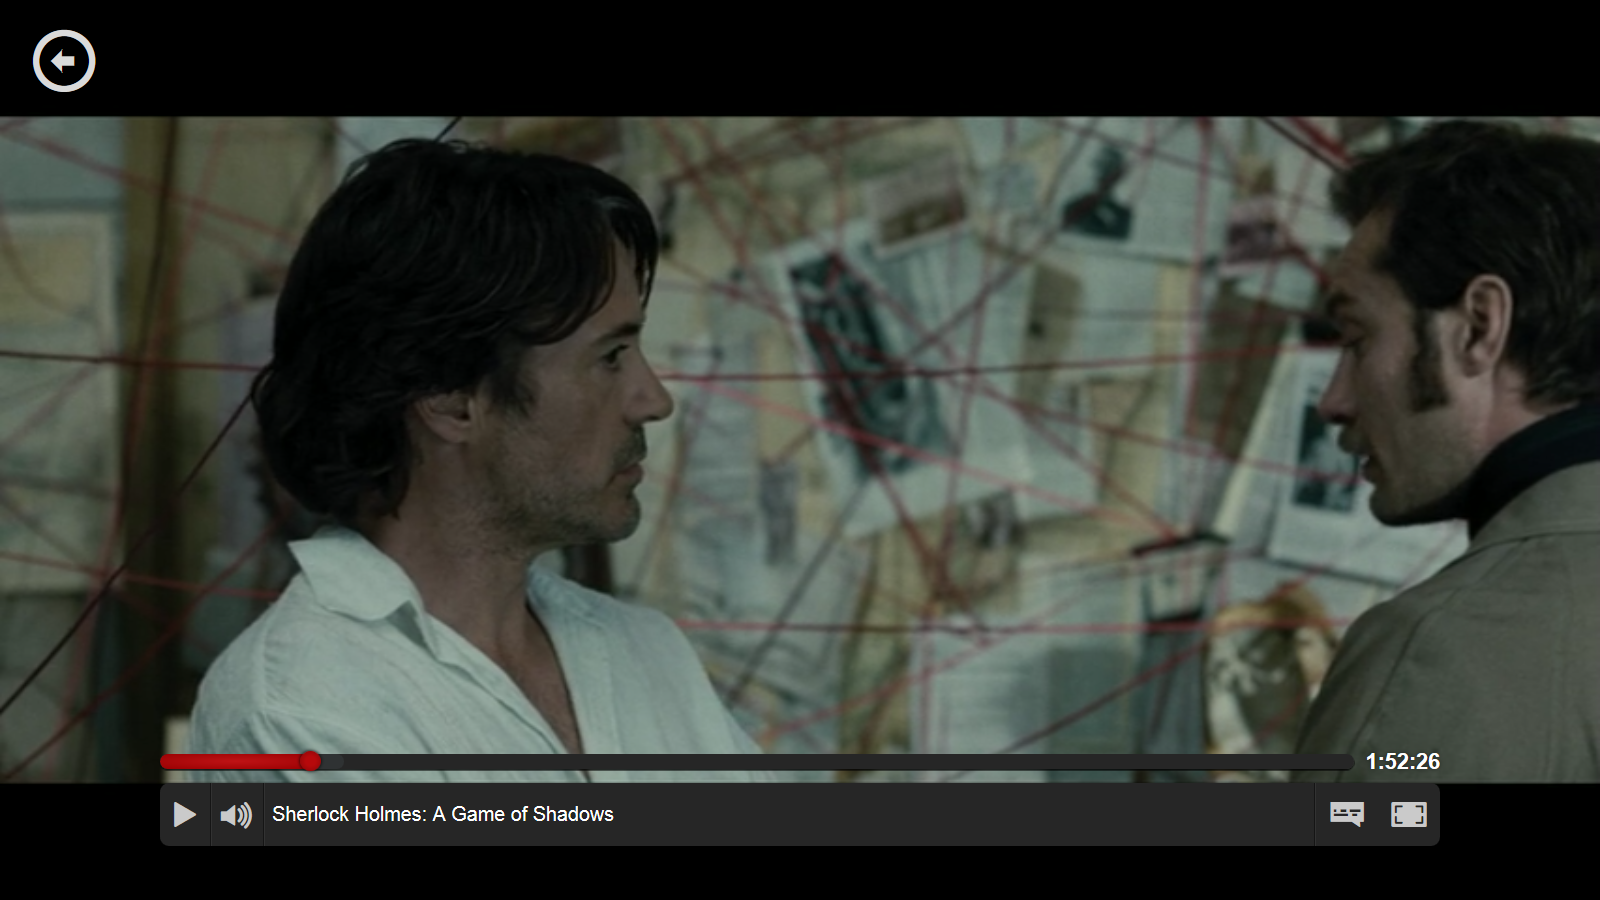

źródło: <a href="www.netflix.com" class="uri">www.netflix.com</a>

##  Sherlock Holmes

Gdy odrzucisz to, co niemożliwe, wszystko pozostałe, choćby najbardziej
nieprawdopodobne, musi być prawdą.



## Probabilistic Models of Cognition

"...models learning and reasoning as inference in complex probabilistic
models..."

<https://probmods.org/>

##  Mokry chodnik

Wychodzimy z domu i widzimy mokry chodnik, dokładniej płytkę chodnikową,
jakie są możliwe przyczyny?

::: incremental
- Deszcz, dla Krakowa to 56%

- Ktoś coś rozlał

- Pies

- Pękła rura

- Auto myjące ulice zalało też chodnik

- Powódź

- Sąsiad wylał coś z okna

- ...

:::

##  Mokry chodnik, dodatkowe dane

Auta ani drzewa nie są mokre.

::: incremental

- Deszcz, dla Krakowa to 56%

- Ktoś coś rozlał

- Pies

- Pękła rura

- Auto myjące ulice zalało też chodnik

- Powódź

- Sąsiad wylał coś z okna

- ...

:::

##  Bayesowska Analiza danych

\begin{tikzpicture}
\draw  (-3,3) ellipse (1. and 0.75);
\node at (-3,3) {Ekspert, itd.};

\uncover<2->{
  \draw [->] (-2,3) -- (0,3);
  \node at (-1,3) {\parbox{2cm}{\centering
  prawdopo. \\ a priori}};
  }
\uncover<3->{
  \draw  (1,5) ellipse (1 and 0.75);
  \node at (1,5) {Dane};
  \draw [->] (1,5-0.75) -- (1,3+0.75);
  \draw  (1,3) ellipse (1 and 0.75);
  \node at (1,3) {Bayes};
}

\uncover<4->{
  \draw [->] (2,3) -- (4,3);
  \node at (3,3) {\parbox{2cm}{\centering
  prawdopo. \\ a posteriori}};
  }


\uncover<5->{
  \draw  (5,3) ellipse (1 and 0.75);
  \node at (5,3) {Wnioski};
}
\end{tikzpicture}


##  Wzory

$$\alert{\underbrace{\color{black}P(\theta|D)}_
    {\mathclap{\text{pr. a posteriori}}}}
  {=}
  \frac{\alert{\overbrace{\color{black}P(D|\theta)}^
      {\text{wiarygodność}}}
  {\times}
  \alert{\overbrace{\color{black}P(\theta)}^
    {\text{pr. a priori}}}}{\alert{\underbrace{\color{black}P(D)}_
        {\mathclap{\text{dane}}}}}$$

##  Wzory

$$\alert{\underbrace{\color{black}P(\theta|D)}_
    {\mathclap{\text{pr. a posteriori}}}}
  {=}
  \frac{\alert{\overbrace{\color{black}P(D|\theta)}^
      {\text{wiarygodność}}}
  {\times}
  \alert{\overbrace{\color{black}P(\theta)}^
    {\text{pr. a priori}}}}{\alert{\underbrace{\color{black}\int_{\Theta}P(D|\theta^*)f(\theta^*)d\theta^*}_
        {\mathclap{\text{dane}}}}}$$

##  Przykład testu choroby

Test wykrywa chorobę u chorego pacjenta z pr. 0.99.

##  Przykład testu choroby

Przyjmijmy $P(\text{chory})=0.01$. Wtedy dla 100 000 ludzi otrzymuje:

::: incremental

- 1 000 chorych

- 99 000 zdrowych

- 1 000\*0.99 = 990 poprawnie zdiagnozowanych chorych

- 99 000\*0.05 = 4 950 błędnie zdiagnozowanych jako chorzy

- ogółem mamy 5 940 diagnoz choroby i tylko 990 chorych

- czyli prawdopodobieństwo, że się jest chorym jeżeli test wykazał
  chorobę jest 990/5940 = 1/6 $\simeq$ 0.167!

:::

##  Przykład testu choroby

Przyjmijmy teraz, że jest to rzadsza choroba i $P(\text{chory})=0.001$.
Wtedy dla 100 000 ludzi otrzymuje:

- 100 chorych

- 99 900 zdrowych

- 100\*0.99 = 99 poprawnie zdiagnozowanych chorych

- 99 900\*0.05 = 4 995 błędnie zdiagnozowanych jako chorzy

- ogółem mamy 5 094 diagnoz choroby i tylko 99 chorych

- czyli prawdopodobieństwo, że się jest chorym jeżeli test wykazał
  chorobę jest 99/5094$\simeq$<!-- -->0.019!

##  Przykład testu choroby formalnie

$P(\text{chory})=0.001$, $P(+|\text{zdrowy})=0.05$,
$P(+|\text{chory})=0.99$, $P(\text{chory}|+)=?$

$$P(\text{chory}|+)=\frac{P(+|\text{chory})P(\text{chory})}{P(+)}$$

$$P(\text{chory}|+)=\frac{P(+|\text{chory})P(\text{chory})}{P(+|\text{chory})P(\text{chory})+P(+|\text{zdrowy})(1-P(\text{chory}))}$$

$$P(\text{chory}|+)=\frac{0.99\times0.001}{0.99\times0.001+0.05\times0.999}\simeq0.019$$



##  Przykład z życia wzięty

TED - Peter Domelly: “How juries are fooled by statistics”

$$P(\text{
śmierć łużeczkowa})=\frac{1}{8500}$$

$$P(\text{śmierć łużeczkowa i śmierć łużeczkowa} )=\frac{1}{8500}\frac{1}{8500}\simeq\frac{1}{72\text{miliony}}$$

$$P(\text{morderczyni})=1-P(\text{2 x śmierć łużeczkowa} )=1-\frac{1}{72\text{miliony}}$$

Z tego wynika, że mordowanie dzieci przez matki jest bardzo powszechne
co jest oczywistą bzdurą.


%Sally Clark
% https://www.ted.com/talks/peter_donnelly_how_juries_are_fooled_by_statistics#t-833274
% 13:45

% Szanse na 2 smeirci łużeczkowe 1/72 mln
% Eksper załozyk niezależność

% błedna interpretacja: ze szanse ze jest neiwiunna sa jak 1 do 72 mln
% Opcje: 1 jest niewinna (bardzo prawdopodbne), winna	


##  Przykład monety, wypadł jeden orzeł

\begin{tikzpicture}

\node at (-3,3.75) {a priori $P(\theta)=f(\theta)$};
\node at (-3,1.75) {\includegraphics[width=0.45\textwidth]{apriori.pdf}};

\uncover<2->{
\node at (-3,-3.75) {wiarygodność $P(D|\theta)=f(D|\theta)$};
\node at (-3,-1.75) {\includegraphics[width=0.45\textwidth]{likelihood.pdf}};
}

\uncover<3->{
\node at (3,3) {$f(\theta|D)=\frac{(1-\theta)f(\theta)}{\int_{0}^{1}(1-\theta^*)f(\theta^*)d\theta^*}$};
}

\uncover<4->{
\node at (3,0) {\includegraphics[width=0.45\textwidth]{aposteriori.pdf}};
\node at (3,-2) {a posteriori $P(\theta|D)=f(\theta|D)$};

\draw [->] (-0.5,0.5) -- (0.5,0.15);
\draw [->] (-0.5,-0.5) -- (0.5,-0.15);
}		
\end{tikzpicture}


##  Przykład monety, trzy orły i jedna reszka

\begin{tikzpicture}
    
    \node at (-3,3.75) {a priori $P(\theta)=f(\theta)$};
    \node at (-3,1.75) {\includegraphics[width=0.45\textwidth]{apriori.pdf}};


    \node at (-3,-3.75) {wiarygodność $P(D|\theta)=f(D|\theta)$};
    \node at (-3,-1.75) {\includegraphics[width=0.45\textwidth]{wiarygodnosc4.pdf}};


\uncover<2->{
    \node at (3,3) {$f(\theta|D)=\frac{{4 \choose 1}\theta(1-\theta)^3f(\theta)}{\int_{0}^{1}{4 \choose 1}\theta^*(1-\theta^*)^3f(\theta^*)d\theta^*}$};
    }
    
\uncover<3->{
    \node at (3,0) {\includegraphics[width=0.45\textwidth]{aposteriori4.pdf}};
    \node at (3,-2) {a posteriori $P(\theta|D)=f(\theta|D)$};

    \draw [->] (-0.5,0.5) -- (0.5,0.15);
    \draw [->] (-0.5,-0.5) -- (0.5,-0.15);
}		
\end{tikzpicture}

##  Przykład monety, trzydzieści orłów i dziesięć reszek

\begin{tikzpicture}
		
		\node at (-3,3.75) {a priori $P(\theta)=f(\theta)$};
		\node at (-3,1.75) {\includegraphics[width=0.45\textwidth]{apriori.pdf}};


		\node at (-3,-3.75) {wiarygodność $P(D|\theta)=f(D|\theta)$};
		\node at (-3,-1.75) {\includegraphics[width=0.45\textwidth]{wiarygodnosc40.pdf}};


	\uncover<2->{
		\node at (3,3) {$f(\theta|D)=\frac{{40 \choose 10}\theta^{10}(1-\theta)^{30}f(\theta)}{\int_{0}^{1}{40 \choose 10}{\theta^*}^{10}(1-\theta^*)^{30}f(\theta^*)d\theta^*}$};
		}
		
	\uncover<3->{
		\node at (3,0) {\includegraphics[width=0.45\textwidth]{aposteriori40.pdf}};
		\node at (3,-2) {a posteriori $P(\theta|D)=f(\theta|D)$};

		\draw [->] (-0.5,0.5) -- (0.5,0.15);
		\draw [->] (-0.5,-0.5) -- (0.5,-0.15);
	}		
\end{tikzpicture}


## Moneta

Jakie jest prawdopodobienstwo $p$ wylosowania orła?

Jeżeli obserwujemy:

--- 

In [ ]:
import sympy
from sympy import symbols, Piecewise, integrate, simplify

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math, Markdown



p = symbols('p')
papr = Piecewise((4*p, p < 1/2), (4 - 4*p, p >= 1/2))

pl_pr = sympy.plot(papr, (p, 0, 1),  xlabel='p', ylabel='f(p)', show=False)
#pl.show()

for no,nr in [(1,0),(3,1),(30,10)]:
    #Dla otrzymania 1 orła i 3 reszek otrzymamy funkcjię likelihood postaci
    display(Markdown(f'### Wypadło {no} orłow i {nr} reszek'))

    likelihood = sympy.binomial(no+nr,nr)*(1 - p)**nr * p**no
    pl_lik = sympy.plot(likelihood, (p, 0, 1),  xlabel='p', ylabel='f(data|p)', show=False);
    #pl.show()


    unnormalized_posterior = likelihood * papr
    marginal_likelihood = integrate(unnormalized_posterior, (p, 0, 1))
    post = unnormalized_posterior / marginal_likelihood

    t = sympy.latex(sympy.simplify(post))
    pl_pos=sympy.plot(post, (p, 0, 1),  xlabel='p', ylabel='f(p|data)', show=False) 
    #pl.show()

    plotgrid = sympy.plotting.PlotGrid(2, 2, pl_pr,pl_pos,pl_lik, show=False,size=(7,4.0))
    plotgrid.show()
    display(Markdown('\n --- \n'))
    display(Latex(r'$$'+t+r'$$'))
    display(Markdown('\n --- \n'))

## Estymatory numeryczne

- MAP $\arg\max P(\theta | D)$
- Częściej $E P(\theta | D)$
- Niepewność to kwantyle $P(\theta | D)$


## Podsumowanie

- Parametry rozkladu zamieniamy na zmienne losowe

- Wzór Bayesa daje nam rozkład a posteriori

- Wiedza ekspecka dodana do modelu w postaci a priori



# {.standout}

Pytania